<a href="https://colab.research.google.com/github/aenaghai/CP301/blob/main/face_recg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import cv2
import numpy as np
import pandas as pd
import os # accessing directory structure
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [119]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
!pip install -q kaggle
os.environ['KAGGLE_USERNAME'] = "aenaghai5"
os.environ['KAGGLE_KEY'] = "3e96f462e03063f3137e83401b19d220"
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
import opendatasets as od
import pandas
od.download(
	"https://www.kaggle.com/datasets/chinafax/cfpw-dataset")

Skipping, found downloaded files in "./cfpw-dataset" (use force=True to force download)


In [123]:
folder='/content/drive/MyDrive/dataset'
width_img=224
height_img=224

In [124]:
from mtcnn import MTCNN
detector=MTCNN()

In [125]:
results=[]

In [126]:
img_dir=os.path.join(".", folder)

In [127]:
OriginalImages = []
UpsampledImages = []
labels=[]
lables_test=[]
OriginalImagesTest = []
d=[]
f=[]
y=0
j=0

for path, directories, files in os.walk('/content/cfpw-dataset/cfp-dataset/Data/Images'):
    y+=1
    i=0
    if(j>=20):
        break
    for fil in files:
        i+=1
        d.append(path)
        x=path
        f.append(fil)
        if(x[-7:]=="frontal"):
            if(i<=1):
                image = os.path.join(path, fil)
                OriginalImages.append( os.path.join(path, fil))
                j+=1
                labels.append(y)
            elif(i==2):
                image = os.path.join(path, fil)
                OriginalImagesTest.append( os.path.join(path, fil))
                lables_test.append(y)
                break
        else:
            break
        
print('Total images ', len(OriginalImages))

def displayImage(imagePath):
    image = mpimg.imread(imagePath)
    plt.imshow(image)
    print('Image path', imagePath)
    print('Image size -', image.shape)

Total images  20


In [128]:
OriginalImages

['/content/cfpw-dataset/cfp-dataset/Data/Images/313/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/224/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/430/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/468/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/049/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/217/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/366/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/460/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/408/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/136/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/239/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/377/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/447/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-dataset/Data/Images/310/frontal/01.jpg',
 '/content/cfpw-dataset/cfp-datase

In [129]:
from PIL import Image
import glob
image_list = []
for i in OriginalImages:
  for filename in glob.glob(i): 
      im=Image.open(filename)
      image_list.append(im)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


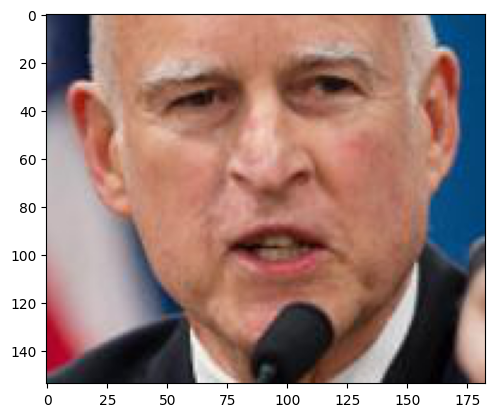

In [130]:
plt.imshow(image_list[1])
print(type(image_list[1]))

In [131]:
def detect_face(image):
    detector=MTCNN()
    bounds=detector.detect_faces(image)
    return bounds

In [132]:
def draw_bounding_boxes(image, bboxes):
    for box in bboxes:
        x,y,w,h=box['box']
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)

In [133]:
def mark_key_point(image, keypoint):
    cv2.circle(image, (keypoint), 1, (0,255,0), 2)

In [134]:
image = cv2.imread(OriginalImages[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = detect_face(image)
print("Output of MTCNN detector is...\n",bboxes)

1/1 [==============================] - 0s 105ms/step
Output of MTCNN detector is...
 [{'box': [39, 0, 232, 252], 'confidence': 0.995126485824585, 'keypoints': {'left_eye': (99, 72), 'right_eye': (213, 68), 'nose': (161, 124), 'mouth_left': (118, 184), 'mouth_right': (211, 180)}}]


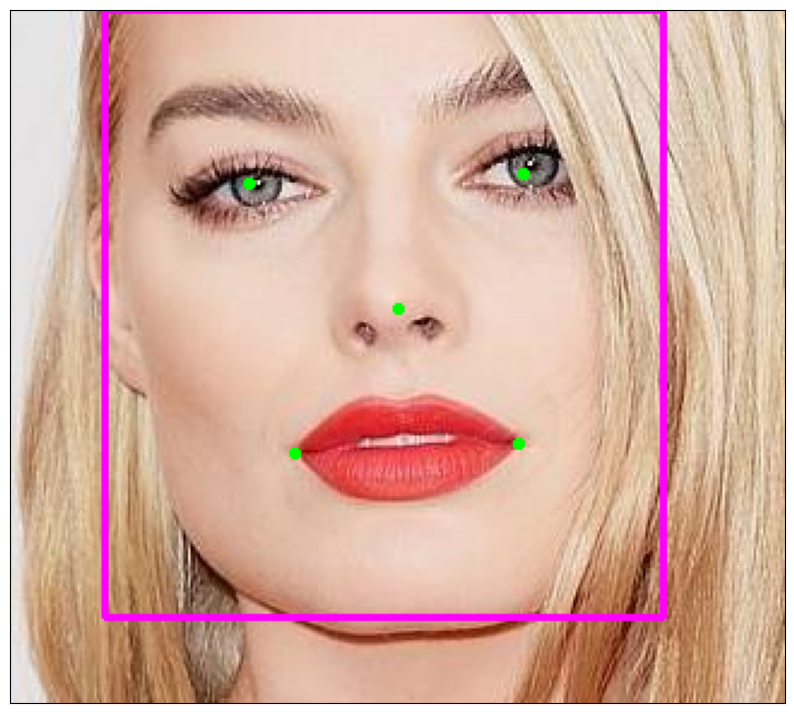

In [135]:
draw_bounding_boxes(image, bboxes)
mark_key_point(image, bboxes[0]['keypoints']['left_eye'])
mark_key_point(image, bboxes[0]['keypoints']['right_eye'])
mark_key_point(image, bboxes[0]['keypoints']['nose'])
mark_key_point(image, bboxes[0]['keypoints']['mouth_left'])
mark_key_point(image, bboxes[0]['keypoints']['mouth_right'])

# display the image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [136]:
for i in range(len(OriginalImages)):
  image=cv2.imread(OriginalImages[i])
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  bboxes=detect_face(image)
  results.append(bboxes)
  print("Output of MTCNN detector is...\n",bboxes)

1/1 [==============================] - 0s 102ms/step
Output of MTCNN detector is...
 [{'box': [39, 0, 232, 252], 'confidence': 0.995126485824585, 'keypoints': {'left_eye': (99, 72), 'right_eye': (213, 68), 'nose': (161, 124), 'mouth_left': (118, 184), 'mouth_right': (211, 180)}}]
1/1 [==============================] - 0s 181ms/step
Output of MTCNN detector is...
 [{'box': [31, 0, 123, 129], 'confidence': 0.9998868703842163, 'keypoints': {'left_eye': (63, 36), 'right_eye': (117, 30), 'nose': (91, 65), 'mouth_left': (77, 99), 'mouth_right': (117, 96)}}]
1/1 [==============================] - 0s 167ms/step
Output of MTCNN detector is...
 [{'box': [64, 0, 271, 298], 'confidence': 0.9992825388908386, 'keypoints': {'left_eye': (131, 70), 'right_eye': (270, 65), 'nose': (208, 166), 'mouth_left': (151, 212), 'mouth_right': (267, 206)}}]
1/1 [==============================] - 0s 191ms/step
Output of MTCNN detector is...
 [{'box': [13, 16, 76, 90], 'confidence': 0.9996947050094604, 'keypoints': 

In [137]:
results
#the 'box' defines the corners of the face, we need to extract that ^_^

[[{'box': [39, 0, 232, 252],
   'confidence': 0.995126485824585,
   'keypoints': {'left_eye': (99, 72),
    'right_eye': (213, 68),
    'nose': (161, 124),
    'mouth_left': (118, 184),
    'mouth_right': (211, 180)}}],
 [{'box': [31, 0, 123, 129],
   'confidence': 0.9998868703842163,
   'keypoints': {'left_eye': (63, 36),
    'right_eye': (117, 30),
    'nose': (91, 65),
    'mouth_left': (77, 99),
    'mouth_right': (117, 96)}}],
 [{'box': [64, 0, 271, 298],
   'confidence': 0.9992825388908386,
   'keypoints': {'left_eye': (131, 70),
    'right_eye': (270, 65),
    'nose': (208, 166),
    'mouth_left': (151, 212),
    'mouth_right': (267, 206)}}],
 [{'box': [13, 16, 76, 90],
   'confidence': 0.9996947050094604,
   'keypoints': {'left_eye': (31, 45),
    'right_eye': (67, 44),
    'nose': (50, 65),
    'mouth_left': (34, 81),
    'mouth_right': (68, 79)}}],
 [{'box': [41, 0, 362, 386],
   'confidence': 0.9999346733093262,
   'keypoints': {'left_eye': (140, 89),
    'right_eye': (311, 

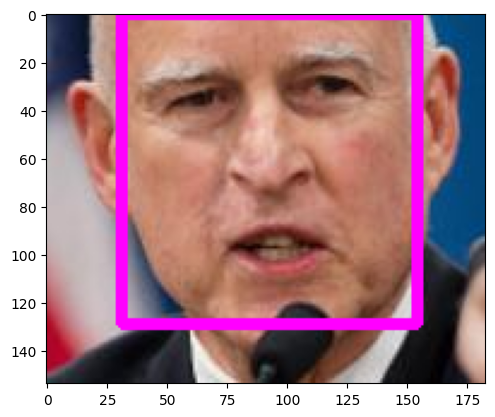

In [138]:
image=cv2.imread(OriginalImages[1])
x,y,w,h=results[1][0]['box']
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),4)
plt.imshow(image)

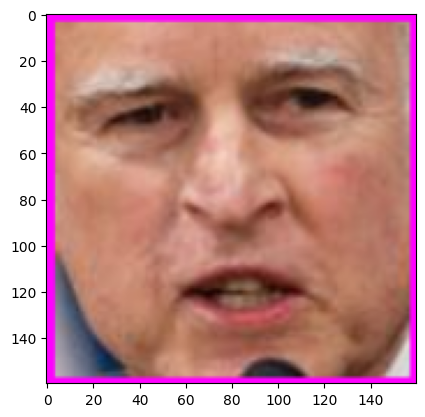

In [139]:
cropped=image[y:y+h,x:x+w]
#facenet takes in 160x160
cropped=cv2.resize(cropped,(160,160))
plt.imshow(cropped)

In [140]:
cropped

array([[[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       ...,

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [244,  44, 245],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]]

#preprocessing

In [141]:
detector=MTCNN()

In [142]:
class Load_Face:
  def __init__(self,directory):
    #x:stores all images, y:stores all labels
    self.directory=directory
    self.size=(160,160)
    self.x=[]
    self.y=[]
    self.detector=MTCNN()

  def extract_face(self,file):
    image=cv2.imread(file)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x,y,w,h=self.detector.detect_faces(image)[0]['box']
    x,y=abs(x),abs(y)
    cropped_face=image[y:y+h,x:x+w]
    face_array=cv2.resize(cropped_face,self.size)
    return face_array
  
  def load_faces(self,dir):
    faces=[]
    for img_name in os.listdir(dir):
      try:
        path=dir+img_name
        single_face=self.extract_face(path)
        faces.append(single_face)
      except Exception as e:
        pass
    return faces 
  
  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
            path=self.directory +'/'+ sub_dir+'/'
            faces=self.load_faces(path)
            labels=[sub_dir for _ in range(len(faces))]
            print(f"Loaded successfully: {len(labels)}")
            self.x.extend(faces)
            self.y.extend(labels)
        
    return np.asarray(self.x), np.asarray(self.y)


In [143]:
face_loading=Load_Face('/content/drive/MyDrive/dataset')
x,y=face_loading.load_classes()

1/1 [==============================] - 0s 19ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 23ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 22ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 18ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 25ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 17ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 28ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 25ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 17ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 18ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 22ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 23ms/step
Loaded successfully: 9
1/1 [===============

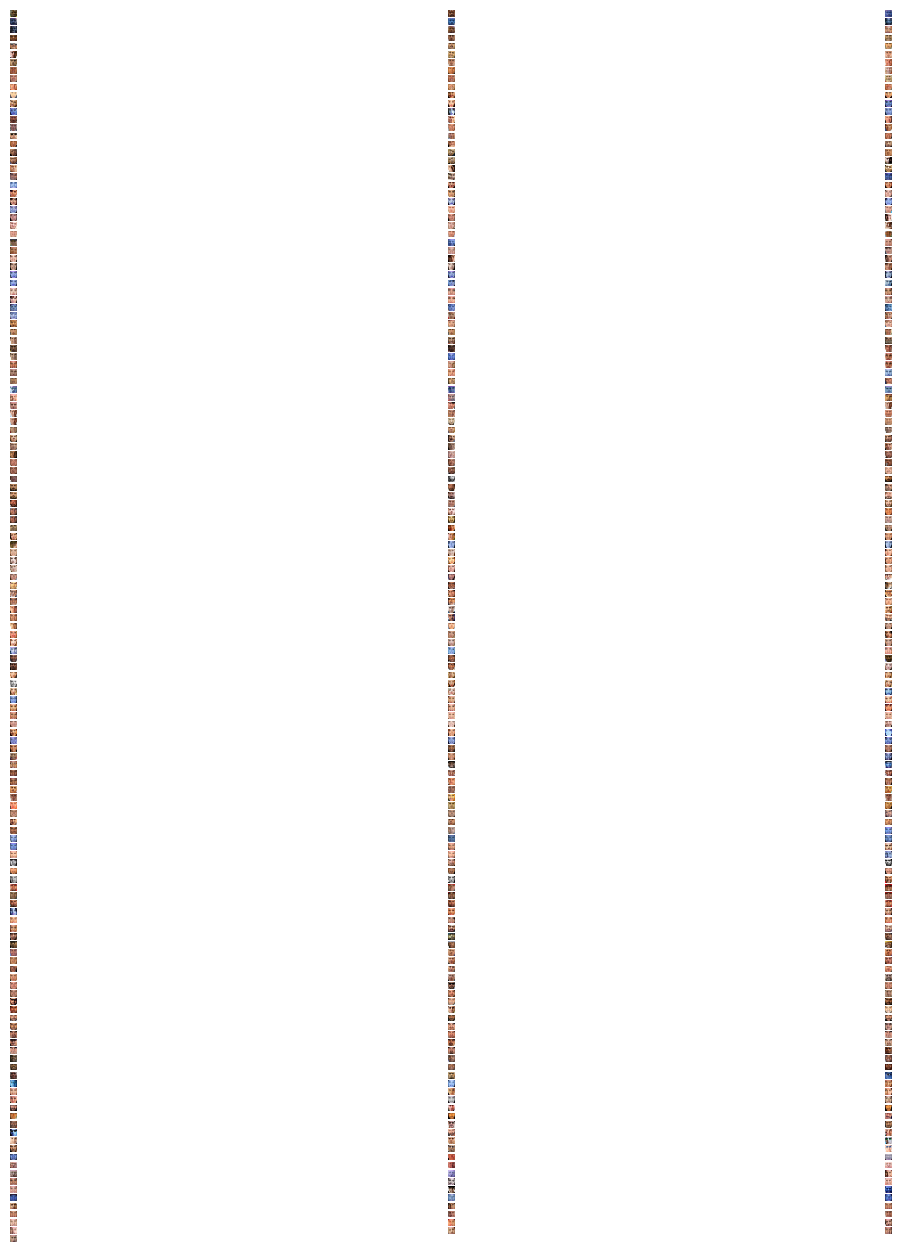

In [144]:
plt.figure(figsize=(16,16))
for num,image in enumerate(x):
    ncols=3
    nrows=len(y)//ncols+1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

#facenet part

In [145]:
!pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [146]:
from keras_facenet import FaceNet
embedder=FaceNet()

In [147]:
def extract_embedding(face_img):
  face_img=face_img.astype('float32') #3d, 160x160x3
  face_img=np.expand_dims(face_img,axis=0) #facenet image is 3d, we need 4d (None*160*160*3)
  yhat=embedder.embeddings(face_img)
  return yhat[0] #512D image (1x1x512)

In [148]:
embedded_x=[]
for img in x:
  embedded_x.append(extract_embedding(img))
embedded_x=np.asarray(embedded_x) 

1/1 [==============================] - 0s 68ms/step


In [149]:
np.savez_compressed('face_embedding.npz',embedded_x,y) #provides storage of array data using gzip compression

#svm model

In [150]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)

In [151]:
len(embedded_x)

451

In [152]:
len(y)

451

In [153]:
y

array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 45, 45, 45, 45,
       45, 45, 45, 45, 45, 48, 48, 48, 48, 48, 48, 48, 48, 48, 46, 46, 46,
       46, 46, 46, 46, 46, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41,
       41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37,
       37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26,
       26, 26, 26, 26, 26

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train,X_test,y_train,y_test=train_test_split(embedded_x,y,shuffle=True,test_size=0.3,random_state=17)

In [156]:
from sklearn.svm import SVC
model=SVC(kernel='linear', probability=True)
model.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [157]:
y_predict_train=model.predict(X_train)
y_predict_test=model.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_predict_train)

1.0

In [159]:
accuracy_score(y_test,y_predict_test)

0.9632352941176471

Text(0, 0.5, '50')

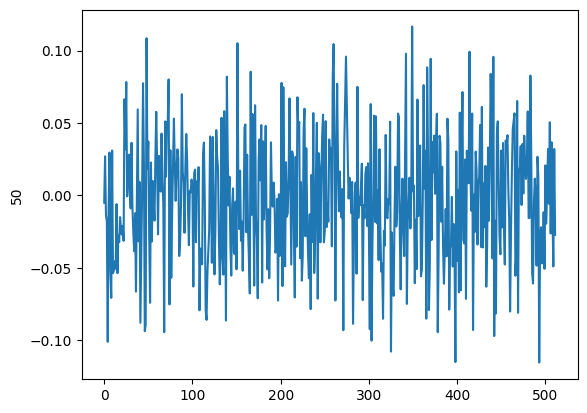

In [160]:
plt.plot(embedded_x[0]) 
plt.ylabel(y[0])

In [161]:
import pickle
#save the model
with open('SVM_model.pkl','wb') as f:
    pickle.dump(model,f)